In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("diabetic_data_initial.csv")
df=df.replace(df.weight[0],np.nan)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df.admission_type_id.unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [5]:
df.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [6]:
df=df.drop(['encounter_id','patient_nbr'],axis=1)

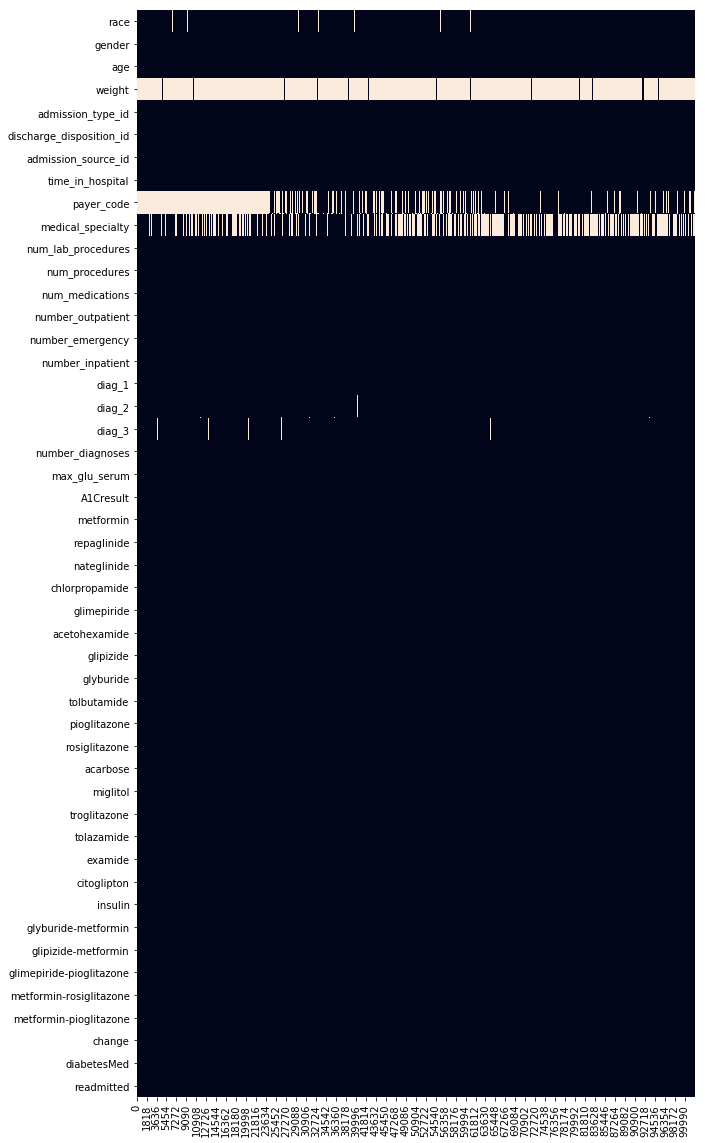

In [7]:
plt.figure(figsize=(10,20))
sns.heatmap(df.isnull().T, cbar=False)

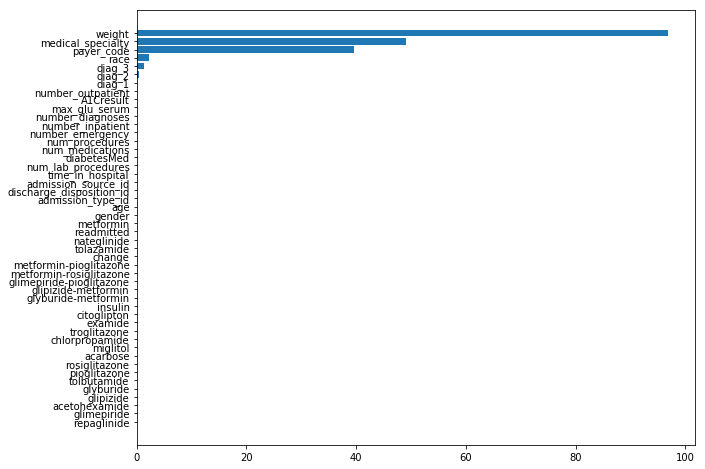

In [8]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [9]:
df=df.drop(["weight",'medical_specialty','payer_code'],axis=1)

In [10]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
df.diag_3.unique()

array([nan, '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '599', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '250.7', '250.52', '784',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '196',
       '461', '535', '787', '891', '284', '458', '648', '780', '182',
       '285', '593', '413', '664', '564', '201', '356', 'V15', '2

In [12]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [13]:
df=df[df.gender!="Unknown/Invalid"]

In [14]:
df.shape

(101763, 45)

In [15]:
df=df.dropna()
df.shape

(98052, 45)

In [16]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)

df.dropna(inplace=True)

df['age'] = df['age'].str[1:].str.split('-',expand=True)[0]
df['age'] = df['age'].astype(int)
max_glu_serum_dict = {'None':0,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_dict)

A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)

change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)

d24_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':0,
                    'No':-20
                   }
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in d24_cols:
    df[col] = df[col].replace(d24_feature_dict)

condition = df['readmitted']!='NO'
df['readmitted'] = np.where(condition,1,0)

df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,10,1,1,7,3,59,0,18,...,-20,10,-20,-20,-20,-20,-20,1,1,1
2,AfricanAmerican,Female,20,1,1,7,2,11,5,13,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,Caucasian,Male,30,1,1,7,2,44,1,16,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,Caucasian,Male,40,1,1,7,1,51,0,8,...,-20,0,-20,-20,-20,-20,-20,1,1,0
5,Caucasian,Male,50,2,1,2,3,31,6,16,...,-20,0,-20,-20,-20,-20,-20,-1,1,1


In [17]:
df.shape

(98052, 45)

In [18]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df.dtypes

race                        object
gender                      object
age                          int32
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone        

In [20]:
cat_cols = list(df.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
df.head()


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Respiratory,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory
1,10,1,1,7,3,59,0,18,0,0,...,0,0,0,0,0,0,0,0,1,0
2,20,1,1,7,2,11,5,13,2,0,...,0,0,0,0,0,0,0,0,1,0
3,30,1,1,7,2,44,1,16,0,0,...,0,1,0,0,0,0,0,0,0,0
4,40,1,1,7,1,51,0,8,0,0,...,0,0,1,0,0,0,0,0,0,0
5,50,2,1,2,3,31,6,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
df = df.sample(frac=0.1)
X_train,X_test,y_train,y_test = train_test_split(df.drop('readmitted',axis=1),
                                                 df['readmitted'],
                                                 test_size=0.05,
                                                 random_state=2)
X_train.shape,X_test.shape

((2794, 73), (148, 73))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


ML_models = {}
model_index = ['LogisticRegression(solver=liblinear)','LogisticRegression(solver=lbfgs)','RandomForestClassifier(n_estimators=50)','RandomForestClassifier(n_estimators=100)','RandomForestClassifier(n_estimators=150)',
               'RandomForestClassifier(n_estimators=200)','MLPClassifier([100]*5,early_stopping=True,learning_rate=adaptive)','MLPClassifier([100]*5,learning_rate=adaptive)','GaussianNB()','KNeighborsClassifier()']
model_sklearn = [LogisticRegression(solver='liblinear'), LogisticRegression(solver='lbfgs'),
                 RandomForestClassifier(n_estimators=50),
                 RandomForestClassifier(n_estimators=100),RandomForestClassifier(n_estimators=150),RandomForestClassifier(n_estimators=200),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive'),MLPClassifier([100]*5,learning_rate='adaptive'),
                 GaussianNB(), KNeighborsClassifier()]
model_summary = []
for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1])])
ML_models

{'LogisticRegression(solver=liblinear)': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'LogisticRegression(solver=lbfgs)': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
           verbose=0, warm_start=False),
 'RandomForestClassifier(n_estimators=50)': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
        

In [33]:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy','AUC_ROC'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy,AUC_ROC
0,0,LogisticRegression(solver=liblinear),0.555369,0.560811,0.598214
1,1,LogisticRegression(solver=lbfgs),0.626764,0.635135,0.633371
2,2,RandomForestClassifier(n_estimators=50),0.607303,0.608108,0.650298
3,3,RandomForestClassifier(n_estimators=100),0.592770,0.594595,0.646298
4,4,RandomForestClassifier(n_estimators=150),0.572950,0.574324,0.606027
5,5,RandomForestClassifier(n_estimators=200),0.584159,0.587838,0.631789
6,6,"MLPClassifier([100]*5,early_stopping=True,lear...",0.563255,0.594595,0.548549
7,7,"MLPClassifier([100]*5,learning_rate=adaptive)",0.592372,0.621622,0.585193
8,8,GaussianNB(),0.539152,0.560811,0.566220
9,9,KNeighborsClassifier(),0.507921,0.506757,0.492094
